# Learn How to Create Animated Graphs in Python
- https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe
    
![](https://miro.medium.com/max/576/1*mBJvfCxbvqFeVSJ9U1ey7w.gif)


In [2]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')

In [3]:
df_interest = df.loc[
    df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]

In [5]:
df_interest.rename(
    index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)

M:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
df1 = df_interest.transpose()
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

In [7]:
df1

,Germany,Italy,US,United Kingdom
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0
...,...,...,...,...
2021-11-07,96563,132391,754990,141805
2021-11-08,96731,132423,756220,141862
2021-11-09,96968,132491,757651,142124
2021-11-10,97203,132551,759277,142338


In [18]:
import numpy as np
import matplotlib.pyplot as plt

color= ['red', 'green', 'blue', 'magenta']
fig=   plt.figure()
plt.xticks(rotation= 45, 
           ha= "right", 
           rotation_mode="anchor") #rotate the x-axis values

plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')

def buildmebarchart(i= int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, 
                 df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
    plt.grid()

import matplotlib.animation as ani
animator= ani.FuncAnimation(fig, 
                            buildmebarchart, 
                            interval = 1)


#animator.save('__myfirstAnimation.gif')


#plt.show()


In [16]:
#%matplotlib qt
animator.save('__myfirstAnimation.gif')


# The double pendulum problem
- https://matplotlib.org/2.1.2/gallery/animation/double_pendulum_animated_sgskip.html
    

In [21]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

ani.save('__double_pendulum.gif') #'__double_pendulum.mp4', fps=15)
#plt.show()

<AxesSubplot:xlabel='Date'>

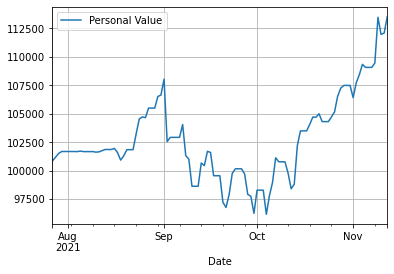

In [1]:
import pandas as pd

X= pd.read_csv('_Transactions_Oct15_2021.csv')
Y= X[['Date', 'Personal Value']].dropna()
Y= Y.iloc[::-1,:]
Y.index = pd.to_datetime(Y.Date)
Y.plot(grid=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#color= ['red', 'green', 'blue', 'magenta']
fig=   plt.figure()
plt.xticks(rotation= 45, 
           ha= "right", 
           rotation_mode="anchor") #rotate the x-axis values

plt.subplots_adjust(bottom = 0.2, 
                    top = 0.9, 
                    left= .2, 
                    right=.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('$USD')
plt.xlabel('Date')
plt.title('Personal Value of Stock in USD$')

def buildmebarchart(i= int):
    
    p= plt.plot(Y['Personal Value'][:i].index, 
                 Y['Personal Value'][:i].values) #note it only returns the dataset, up to the point i
    
    p[0].set_color('green') #set the colour of each curve
    plt.legend(['Personal Value'])
    plt.grid()
    

import matplotlib.animation as ani
animator= ani.FuncAnimation(fig, 
                            buildmebarchart,
                            interval= 50,
                            repeat= True,
                            #cache_frame_data= False
                           )


#plt.show()

#animator.save('__ryPersonalValue.mp4', fps= 15)
animator.save('__ryPersonalValue.gif')


#plt.show()

In [2]:
%matplotlib qt

In [107]:
animator.save('__ryPersonalValue.mp4', fps= 25)

In [55]:
Y[['Date']]= Y['Date'].apply(lambda x: ','.join(x.split(',')[1:]))
Y

,Date,Personal Value
Date,,
July 27,July 27,100847.88
July 28,July 28,101173.54
July 29,July 29,101504.21
July 30,July 30,101674.25
July 31,July 31,101674.25
...,...,...
November 08,November 08,109439.36
November 09,November 09,113461.65
November 10,November 10,111960.93


<AxesSubplot:xlabel='Date'>

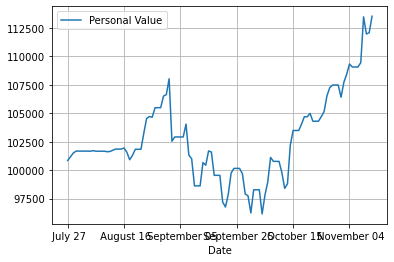

In [56]:
#Y['Date'].apply(lambda x:datetime.strptime(x, ' %b %d, %Y'))

#datetime.strptime(x, '%b%d,%Y')
Y.plot(grid=True)

In [57]:
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime_object

datetime.datetime(2005, 6, 1, 13, 33)

In [60]:
Y.index = pd.to_datetime(Y.Date)


<AxesSubplot:xlabel='Date'>

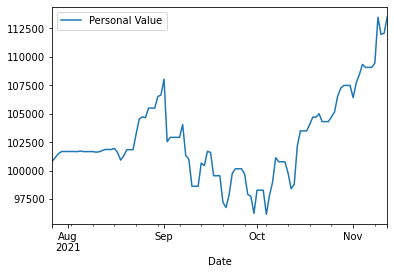

In [62]:
Y.plot()